In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import random
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor

#Common Model Helpers
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import models
from keras import layers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Conv2D, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization, Input, Activation, Dense, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


# 1. Deep Learning Model:

### 1A. Viewing the Data:

In [2]:
directory = os.getcwd()
print(directory)

C:\Users\jeffr\Python\Projects\Deep Learning\Cat Classifier\model


In [3]:
print(os.listdir(directory))

['.ipynb_checkpoints', 'cats_dogsv2.h5', 'Classifier.ipynb', 'Classifierv2.ipynb', 'dogs-vs-cats(1).zip', 'sampleSubmission.csv', 'test', 'test1.zip', 'train', 'train.zip']


os.rename('test1','test')

In [4]:
print(os.listdir(directory))

['.ipynb_checkpoints', 'cats_dogsv2.h5', 'Classifier.ipynb', 'Classifierv2.ipynb', 'dogs-vs-cats(1).zip', 'sampleSubmission.csv', 'test', 'test1.zip', 'train', 'train.zip']


In [5]:
test_directory = directory +'\\test'
train_directory = directory + '\\train'

In [6]:
print(f'The number of training photos are: {len(os.listdir(train_directory))}')

The number of training photos are: 25000


In [7]:
print(f'The number of test photos are: {len(os.listdir(test_directory))}')

The number of test photos are: 12500


In [8]:
print(f'The number of photos are: {len(os.listdir(test_directory)) + len(os.listdir(train_directory))}')

The number of photos are: 37500


In [9]:
train_fnames = [os.path.join(train_directory, fname) for fname in os.listdir(train_directory)]
test_fnames = [os.path.join(test_directory, fname) for fname in os.listdir(test_directory)]

In [10]:
class_names = ['cat','dog']

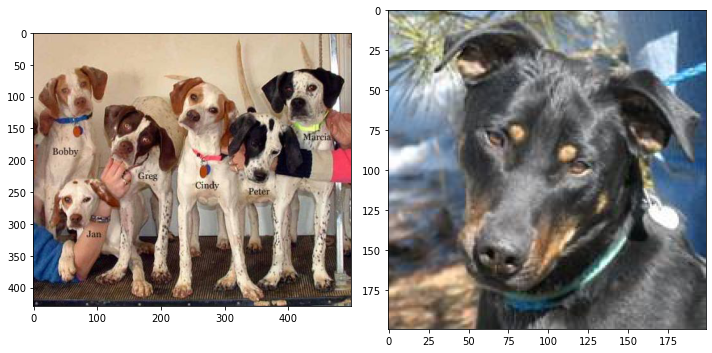

In [11]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows =1,figsize = (10,6))

img1 = mpimg.imread(train_fnames[random.randint(0,25000)])
ax1.imshow(img1)

img2 = mpimg.imread(train_fnames[random.randint(0,25000)])
ax2.imshow(img2)

plt.tight_layout()

In [12]:
train_dog_fnames = [dog for dog in train_fnames if 'dog' in dog]
train_cat_fnames = [cat for cat in train_fnames if 'cat' in cat]

test_dog_fnames = [dog for dog in test_fnames if 'dog' in dog]
test_cat_fnames = [cat for cat in test_fnames if 'cat' in cat]

In [13]:
d = {'Animal': ['train_dog','train_cat','test_dog','test_cat'], 
     'Count of Images': [len(train_dog_fnames), len(train_cat_fnames),len(test_dog_fnames),len(test_cat_fnames)]}

df_bar = pd.DataFrame(data=d)

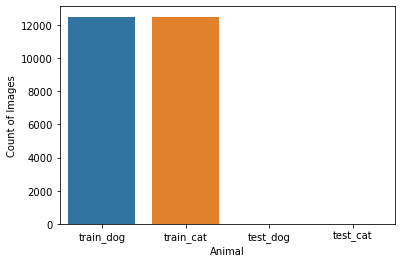

In [14]:
sns.barplot(x = df_bar['Animal'], y =df_bar['Count of Images'])

plt.show()

In [15]:
print(test_fnames[0])

C:\Users\jeffr\Python\Projects\Deep Learning\Cat Classifier\model\test\1.jpg


### 1B. Create Train/Validation Split:

In [16]:
print(f'20 % of the training data is {int(0.2* len(train_fnames))}, therefore {int(0.2*0.5*len(train_fnames))} cats and dogs each.')

20 % of the training data is 5000, therefore 2500 cats and dogs each.


In [17]:
labels = []

for file in os.listdir(train_directory):
    if 'cat' in file:
        labels.append('cat')
    else:
        labels.append('dog')

In [18]:
df = pd.DataFrame(os.listdir(train_directory))
df2 = pd.DataFrame(labels)

In [19]:
df = pd.concat([df[0], df2[0]],axis =1)

In [20]:
df.columns = ['file','label']

In [21]:
df = df.sample(frac=1)

C:\Users\jeffr\Anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


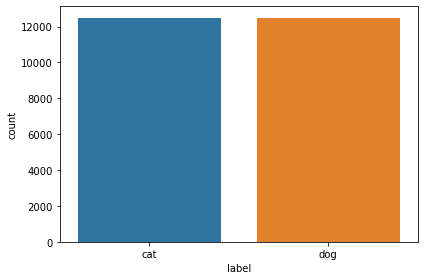

In [22]:
sns.countplot(df['label'])
plt.tight_layout()
plt.show()

In [23]:
train = df['file']
y= df['label']

In [24]:
X_train, X_valid = train_test_split(df, test_size=0.20, train_size=0.80, random_state=42)

In [25]:
print(X_train.shape)

print(X_valid.shape)

(20000, 2)
(5000, 2)


In [26]:
X_train.head()

,file,label
5044,cat.3288.jpg,cat
9519,cat.7315.jpg,cat
15817,dog.1733.jpg,dog
5882,cat.4041.jpg,cat
1200,cat.11077.jpg,cat


In [27]:
X_valid.head()

,file,label
7095,cat.5133.jpg,cat
8200,cat.6128.jpg,cat
22420,dog.7677.jpg,dog
5598,cat.3787.jpg,cat
2501,cat.12248.jpg,cat


### 1C. Preprocessing:

In [28]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

train_generator = train_datagen.flow_from_dataframe(
    X_train, 
    train_directory, 
    x_col='file',
    y_col='label',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32)

Found 20000 validated image filenames belonging to 2 classes.


In [29]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    X_valid, 
    train_directory, 
    x_col='file',
    y_col='label',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32)

Found 5000 validated image filenames belonging to 2 classes.


In [30]:
earlystop = EarlyStopping(patience=10)


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [31]:
callbacks = [earlystop, learning_rate_reduction]

In [32]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 2)


In [33]:
label_map = train_generator.class_indices
print(label_map)

{'cat': 0, 'dog': 1}


In [34]:
example = X_train.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe(
    example, 
    train_directory, 
    x_col='file',
    y_col='label',
    target_size=(150,150),
    class_mode='categorical')

Found 1 validated image filenames belonging to 1 classes.


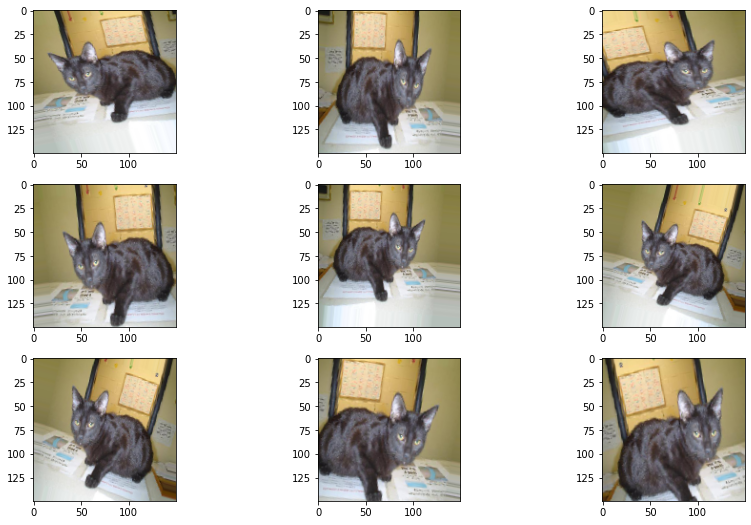

In [35]:
plt.figure(figsize=(12, 12))

for i in range(0, 9):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break

plt.tight_layout()
plt.show()

### 1D. Modelling:

In [36]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)            

In [38]:
history = model.fit_generator(train_generator,epochs=10,validation_data=validation_generator,validation_steps=50,callbacks = callbacks)

Epoch 1/10
625/625 [==============================] - 1597s 3s/step - loss: 0.7162 - accuracy: 0.6214 - val_loss: 0.5545 - val_accuracy: 0.7538
Epoch 2/10


C:\Users\jeffr\Anaconda3\envs\ml\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


625/625 [==============================] - 1699s 3s/step - loss: 0.5713 - accuracy: 0.7062 - val_loss: 0.7166 - val_accuracy: 0.6963
Epoch 3/10
625/625 [==============================] - 1668s 3s/step - loss: 0.5417 - accuracy: 0.7271 - val_loss: 0.3812 - val_accuracy: 0.7763
Epoch 4/10
625/625 [==============================] - 2004s 3s/step - loss: 0.5087 - accuracy: 0.7488 - val_loss: 0.2577 - val_accuracy: 0.8230
Epoch 5/10
625/625 [==============================] - 1598s 3s/step - loss: 0.4928 - accuracy: 0.7594 - val_loss: 0.5580 - val_accuracy: 0.7644
Epoch 6/10
625/625 [==============================] - 1478s 2s/step - loss: 0.4728 - accuracy: 0.7742 - val_loss: 0.2491 - val_accuracy: 0.7912
Epoch 7/10
625/625 [==============================] - 18353s 29s/step - loss: 0.4653 - accuracy: 0.7819 - val_loss: 0.3501 - val_accuracy: 0.7709
Epoch 8/10
625/625 [==============================] - 31607s 51s/step - loss: 0.4532 - accuracy: 0.7890 - val_loss: 0.3514 - val_accuracy: 0.8100

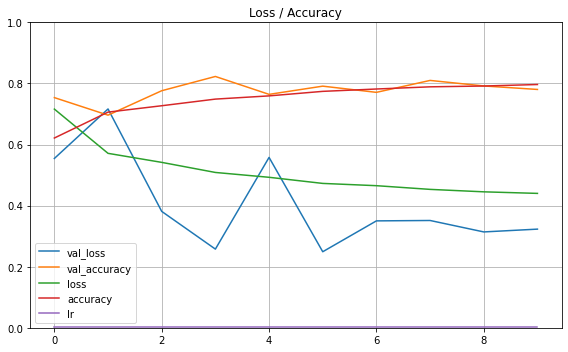

In [39]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.title('Loss / Accuracy')

plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.tight_layout()
plt.show()

In [40]:
model.save('cats_dogsv2.h5')

### 1E. Predictions:

In [41]:
test_fnames[0:5]

['C:\\Users\\jeffr\\Python\\Projects\\Deep Learning\\Cat Classifier\\model\\test\\1.jpg',
 'C:\\Users\\jeffr\\Python\\Projects\\Deep Learning\\Cat Classifier\\model\\test\\10.jpg',
 'C:\\Users\\jeffr\\Python\\Projects\\Deep Learning\\Cat Classifier\\model\\test\\100.jpg',
 'C:\\Users\\jeffr\\Python\\Projects\\Deep Learning\\Cat Classifier\\model\\test\\1000.jpg',
 'C:\\Users\\jeffr\\Python\\Projects\\Deep Learning\\Cat Classifier\\model\\test\\10000.jpg']

In [42]:
test = pd.DataFrame({'file':test_fnames})

In [43]:
test.head()

,file
0,C:\Users\jeffr\Python\Projects\Deep Learning\C...
1,C:\Users\jeffr\Python\Projects\Deep Learning\C...
2,C:\Users\jeffr\Python\Projects\Deep Learning\C...
3,C:\Users\jeffr\Python\Projects\Deep Learning\C...
4,C:\Users\jeffr\Python\Projects\Deep Learning\C...


In [44]:
test.shape

(12500, 1)

In [45]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test, 
    test_directory, 
    x_col='file',
    y_col=None,
    class_mode=None,
    target_size=(150,150),
    batch_size=32,
    shuffle=False)

Found 12500 validated image filenames.


In [46]:
predictions = model.predict_generator(test_generator)

In [47]:
test['label'] = np.argmax(predictions, axis =-1)

In [48]:
test.head()

,file,label
0,C:\Users\jeffr\Python\Projects\Deep Learning\C...,1
1,C:\Users\jeffr\Python\Projects\Deep Learning\C...,0
2,C:\Users\jeffr\Python\Projects\Deep Learning\C...,0
3,C:\Users\jeffr\Python\Projects\Deep Learning\C...,1
4,C:\Users\jeffr\Python\Projects\Deep Learning\C...,0


In [49]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())

In [50]:
test['label'] = test['label'].replace(label_map)

In [51]:
test.head()

,file,label
0,C:\Users\jeffr\Python\Projects\Deep Learning\C...,dog
1,C:\Users\jeffr\Python\Projects\Deep Learning\C...,cat
2,C:\Users\jeffr\Python\Projects\Deep Learning\C...,cat
3,C:\Users\jeffr\Python\Projects\Deep Learning\C...,dog
4,C:\Users\jeffr\Python\Projects\Deep Learning\C...,cat


In [52]:
sample_test = test.head(9)

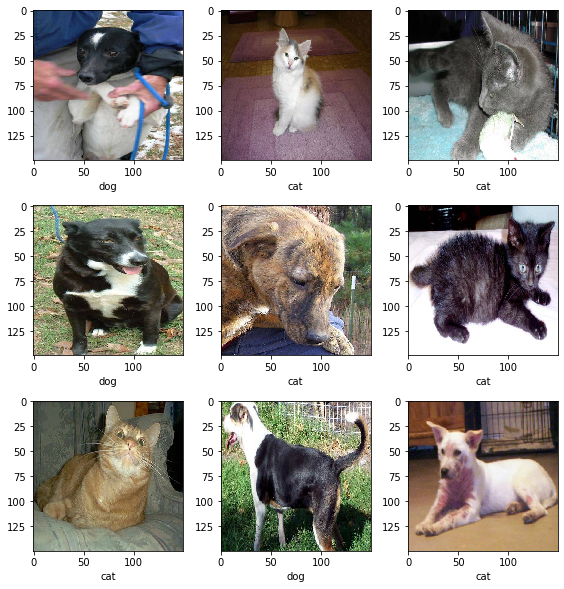

In [53]:
plt.figure(figsize=(8, 16))

for index, row in sample_test.iterrows():
    filename = row['file']
    category = row['label']
    img = load_img(filename, target_size=(150,150))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(category)
    
plt.tight_layout()
plt.show()

In [54]:
eval = model.evaluate_generator(validation_generator)

In [55]:
print(eval)

[0.37899211049079895, 0.7753999829292297]
